In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy
from kneed import KneeLocator

In [5]:
df = pd.read_csv('gapminder_internet.csv')
df = df.dropna()
df.head(214)

,country,incomeperperson,internetuserate,urbanrate
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
5,Antigua and Barbuda,11894.464070,80.645455,30.46
...,...,...,...,...
207,Venezuela,5528.363114,35.850437,93.32
208,Vietnam,722.807559,27.851822,27.84
210,"Yemen, Rep.",610.357367,12.349750,30.64
211,Zambia,432.226337,10.124986,35.42


In [6]:
x = df.iloc[:,[1,2]]
x = x.values.tolist()
x = numpy.array(x)
print(x[0][1])

44.98994696


In [7]:
km = KMeans (n_clusters= 2,
init = 'random', n_init= 10, 
max_iter= 300, tol= 0.01, random_state=0 
)
y_km = km.fit_predict(x)
# print(y_km)
# print(x[True])
# print(x[False])
# print(x[0])
print(x[y_km == 0,0])

[ 1914.996551   2231.993335   1381.004268  11894.46407   10749.41924
  1326.741757   2344.896916  12505.21254     558.0628766  9243.587053
  2737.670379   3545.652174    377.0396995  1324.194906   1232.794137
  2183.344867   4189.436587   4699.411262  17092.46       2549.558474
   276.200413    115.3059959   557.9475126   713.6393027  1959.844472
   239.5187494   275.8842865  6334.105194   2425.471293   3233.42378
   336.3687495   103.7758572  1253.292015   5188.900935    591.0679443
  6338.494668   4495.046262  15313.85935    7381.312751    895.3183396
  6147.77961    4049.169629   1728.020976   1975.551906   2557.433638
  8654.536845    131.796207   6238.537506    220.8912479  2230.676374
  4180.765821    354.5997263  1258.762596    358.9795398 13577.87989
  5330.401612   1860.753895    411.5014473   161.3171371  1200.652075
   371.4241975  1392.411829   5634.003948    786.7000981  1143.831514
  2161.54651     736.2680538  3665.348369   2534.00038    2481.718918
   468.6960436   760.

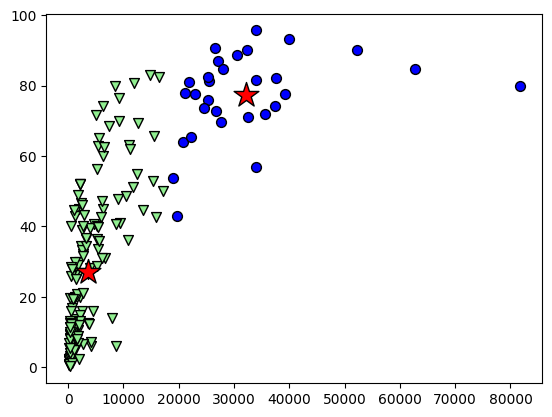

In [8]:
plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='c1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='c2'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=350, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

In [10]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

print(distortions)

[28325483444.820717, 7667952217.541218, 4548256589.398143, 2033181693.032481, 1352579007.2482042, 933955196.7603755, 544971641.8156439, 447478694.39213026, 427015996.9337161, 318761671.8897091]


In [14]:

kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

3

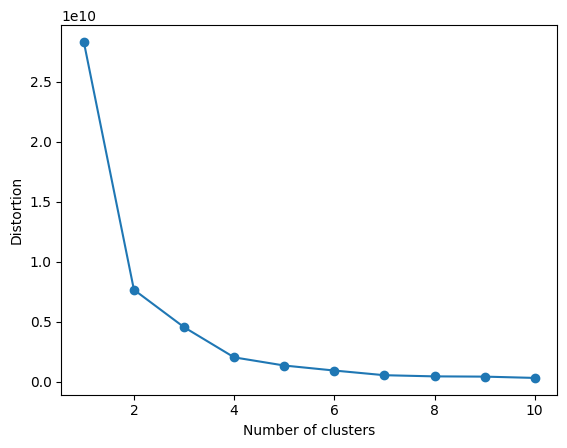

In [15]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()